# Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)  # Show all columns


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

# Load data

In [2]:
file_path = (r"C:\Users\aravit01\Downloads\train.csv")
df = pd.read_csv(file_path)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
def get_null_perc(data):
    null_rows = data.isnull().sum()
    total_rows = data.shape[0]
    null_perc = round((null_rows * 100)/total_rows,2)
    return (null_perc)

In [8]:
df_null_perc = pd.DataFrame(get_null_perc(df).reset_index())
df_null_perc.rename(columns = {"index":"col_name", 0:"null_perc"}, inplace = True)
df_null_perc.sort_values(by='null_perc', ascending=False)

,col_name,null_perc
72,PoolQC,99.52
74,MiscFeature,96.30
6,Alley,93.77
73,Fence,80.75
25,MasVnrType,59.73
...,...,...
27,ExterQual,0.00
24,Exterior2nd,0.00
23,Exterior1st,0.00
22,RoofMatl,0.00


In [9]:
df_null_perc = pd.DataFrame(get_null_perc(df).reset_index())
df_null_perc.rename(columns = {"index":"col_name", 0:"null_perc"}, inplace = True)
sort_values = df_null_perc.sort_values(by='null_perc', ascending=False)
sort_values

,col_name,null_perc
72,PoolQC,99.52
74,MiscFeature,96.30
6,Alley,93.77
73,Fence,80.75
25,MasVnrType,59.73
...,...,...
27,ExterQual,0.00
24,Exterior2nd,0.00
23,Exterior1st,0.00
22,RoofMatl,0.00


In [10]:
df1 = df.drop(columns=['Id','Alley','MasVnrType','PoolQC','Fence','MiscFeature','FireplaceQu'], axis=1)

In [11]:
df1.shape

(1460, 74)

In [12]:
df1.columns = df1.columns.str.lower()

In [13]:
df1.columns

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
       'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle',
       'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle',
       'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrarea', 'exterqual',
       'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf',
       'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical',
       '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath',
       'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf',
       'enclosedpor

observations:
- imported required libraies for analysis
- loaded dataset
- performed initial understanding of data, like shape, describe, isnull, isduplicated etc

In [396]:
df1.select_dtypes(exclude='object').corr()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
mssubclass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
lotfrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
lotarea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
overallqual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
overallcond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
yearbuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
yearremodadd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
masvnrarea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
bsmtfinsf1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
bsmtfinsf2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


# EDA (Exploratatory data analysis)

- univariant analysis: analyze individual features, understand distribution, Central tendency
- bivariant analysis: explore relationship between 2 features
    - categorical to categorical: cross-tab, heatmaps, stacked bars 
    - categorical to numerical: boxplots, 
    - numerical to numerical: scatterplots, linepolts
- Correlation: identifying multicollinearity (highly correlated features can be dropped)
- Missing value analysis: heatmaps
- Outlier detection: IQR
- FE: create or remove features, feature transformation(log, sqrt)
- Target: variable analysis: distribution of target variable 

# Split dataset

In [14]:
X = df1.drop(columns='saleprice', axis=1)
y = df1['saleprice']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (1168, 73)
X_test: (292, 73)
y_train: (1168,)
y_test: (292,)


In [16]:
get_null_perc(X_train)

mssubclass        0.00
mszoning          0.00
lotfrontage      18.58
lotarea           0.00
street            0.00
                 ...  
miscval           0.00
mosold            0.00
yrsold            0.00
saletype          0.00
salecondition     0.00
Length: 73, dtype: float64

In [17]:
get_null_perc(X_test)

mssubclass        0.00
mszoning          0.00
lotfrontage      14.38
lotarea           0.00
street            0.00
                 ...  
miscval           0.00
mosold            0.00
yrsold            0.00
saletype          0.00
salecondition     0.00
Length: 73, dtype: float64

In [637]:
# X_train.replace("", np.nan, inplace = True)
# X_test.replace("", np.nan, inplace = True)

# Outliers detection using IQR

In [150]:
def calculate_iqr(df,col):
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

In [189]:
X_train.shape

(1168, 73)

In [193]:
X_train = X_train[~(X_train['yearbuilt'] < calculate_iqr(X_train,'yearbuilt')[0]) | (X_train['yearbuilt'] > calculate_iqr(X_train,'yearbuilt')[1])]

- removed outliers from yearbuilt 

In [198]:
cols_to_remove = ['lotfrontage','neighborhood', 'condition1','bsmtfinsf1','bsmtfinsf2','bsmtunfsf','1stflrsf','2ndflrsf','lowqualfinsf',
                 'bsmtfullbath','bsmthalfbath','fullbath','halfbath','bedroomabvgr','kitchenabvgr','miscval',
                 ]

In [199]:
X_train = X_train.drop(columns=cols_to_remove, axis = 1)

In [200]:
X_test = X_test.drop(columns=cols_to_remove, axis = 1)

In [202]:
X_train['outside_area'] = X_train['wooddecksf'] + X_train['openporchsf'] + X_train['enclosedporch'] + X_train['3ssnporch'] + X_train['screenporch'] + X_train['poolarea']

In [203]:
X_test['outside_area'] = X_test['wooddecksf'] + X_test['openporchsf'] + X_test['enclosedporch'] + X_test['3ssnporch'] + X_test['screenporch'] + X_test['poolarea']

In [205]:
X_train = X_train.drop(columns=['wooddecksf','openporchsf','enclosedporch','3ssnporch','screenporch','poolarea'], axis = 1)
X_test = X_test.drop(columns=['wooddecksf','openporchsf','enclosedporch','3ssnporch','screenporch','poolarea'], axis = 1)

In [206]:
X_train.shape, X_test.shape

((1163, 52), (292, 52))

In [207]:
X_train

,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,totalbsmtsf,heating,heatingqc,centralair,electrical,grlivarea,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,mosold,yrsold,saletype,salecondition,outside_area
254,20.0,RL,8400.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5.0,6.0,1957.0,1957.0,Gable,CompShg,MetalSd,MetalSd,0.0,TA,Gd,CBlock,TA,TA,No,Rec,Unf,1314.0,GasA,TA,Y,SBrkr,1314.0,TA,5.0,Typ,0.0,Attchd,1957.0,RFn,1.0,294.0,TA,TA,Y,6.0,2010.0,WD,Normal,250.0
1066,60.0,RL,7837.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,6.0,7.0,1993.0,1994.0,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,Unf,Unf,799.0,GasA,Gd,Y,SBrkr,1571.0,TA,7.0,Typ,1.0,Attchd,1993.0,RFn,2.0,380.0,TA,TA,Y,5.0,2009.0,WD,Normal,40.0
638,30.0,RL,8777.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5.0,7.0,1910.0,1950.0,Gable,CompShg,MetalSd,Wd Sdng,0.0,TA,TA,CBlock,Fa,TA,No,Unf,Unf,796.0,GasA,Gd,Y,FuseA,796.0,TA,4.0,Typ,0.0,Attchd,1980.0,Unf,0.0,0.0,TA,TA,P,5.0,2008.0,WD,Normal,492.0
799,50.0,RL,7200.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1.5Fin,5.0,7.0,1937.0,1950.0,Gable,CompShg,Wd Sdng,Wd Sdng,252.0,TA,TA,BrkTil,Gd,TA,No,ALQ,Unf,731.0,GasA,Ex,Y,SBrkr,1768.0,Gd,7.0,Typ,2.0,Detchd,1939.0,Unf,1.0,240.0,TA,TA,Y,6.0,2007.0,WD,Normal,264.0
380,50.0,RL,5000.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1.5Fin,5.0,6.0,1924.0,1950.0,Gable,CompShg,BrkFace,Wd Sdng,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,Unf,1026.0,GasA,TA,Y,SBrkr,1691.0,Gd,6.0,Typ,1.0,Detchd,1924.0,Unf,1.0,308.0,TA,TA,Y,5.0,2010.0,WD,Normal,242.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20.0,RL,9317.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,6.0,5.0,2006.0,2006.0,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,1314.0,GasA,Gd,Y,SBrkr,1314.0,Gd,6.0,Typ,1.0,Attchd,2006.0,RFn,2.0,440.0,TA,TA,Y,3.0,2007.0,WD,Normal,22.0
1130,50.0,RL,7804.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1.5Fin,4.0,3.0,1928.0,1950.0,Gable,CompShg,WdShing,Plywood,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,Unf,1122.0,GasA,TA,Y,SBrkr,1981.0,Gd,7.0,Min2,2.0,Detchd,1981.0,Unf,2.0,576.0,TA,TA,Y,12.0,2009.0,WD,Normal,475.0
1294,20.0,RL,8172.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5.0,7.0,1955.0,1990.0,Hip,CompShg,WdShing,Plywood,0.0,TA,TA,CBlock,TA,TA,No,Rec,Unf,864.0,GasA,TA,Y,SBrkr,864.0,TA,5.0,Typ,0.0,Detchd,1957.0,Unf,2.0,572.0,TA,TA,N,4.0,2006.0,WD,Normal,0.0
860,50.0,RL,7642.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1.5Fin,7.0,8.0,1918.0,1998.0,Gable,CompShg,Wd Sdng,Wd Sdng,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,Unf,912.0,GasA,Gd,Y,SBrkr,1426.0,Gd,7.0,Typ,1.0,Detchd,1925.0,Unf,1.0,216.0,TA,TA,Y,6.0,2007.0,WD,Normal,240.0


In [221]:
X_train[X_train['lotarea'] > 25000].shape

(26, 52)

In [224]:
X_train = X_train[X_train['lotarea'] <= 25000]

In [231]:
X_train.isna().sum()

mssubclass       0
mszoning         0
lotarea          0
street           0
lotshape         0
landcontour      0
utilities        0
lotconfig        0
landslope        0
condition2       0
bldgtype         0
housestyle       0
overallqual      0
overallcond      0
yearbuilt        0
yearremodadd     0
roofstyle        0
roofmatl         0
exterior1st      0
exterior2nd      0
masvnrarea       0
exterqual        0
extercond        0
foundation       0
bsmtqual         0
bsmtcond         0
bsmtexposure     0
bsmtfintype1     0
bsmtfintype2     0
totalbsmtsf      0
heating          0
heatingqc        0
centralair       0
electrical       0
grlivarea        0
kitchenqual      0
totrmsabvgrd     0
functional       0
fireplaces       0
garagetype       0
garageyrblt      0
garagefinish     0
garagecars       0
garagearea       0
garagequal       0
garagecond       0
paveddrive       0
mosold           0
yrsold           0
saletype         0
salecondition    0
outside_area     0
dtype: int64

observations:
- after clear understanding of data, dropped few features which are irrelavent to our analysis.
- few derived features
- added new features by combining multiple features
- after clear observation of data, we consider lotsarea > 25000 is considered as outliers & further proceeded with analysis

# Simple Imputation

### categorical features with nulls are imputed by mode
### numerical features with nulls are imputed by median

In [228]:
from sklearn.impute import SimpleImputer

In [229]:
categorical_cols = X_train.select_dtypes(include='object').columns
numerical_cols = X_train.select_dtypes(exclude='object').columns

cat_imputer = SimpleImputer(strategy='most_frequent')
num_imputer = SimpleImputer(strategy='median')

In [239]:
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])

C:\Users\aravit01\AppData\Local\Temp\ipykernel_30412\3667291736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])
C:\Users\aravit01\AppData\Local\Temp\ipykernel_30412\3667291736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = num_imputer.fit_transform(X_train[numerical_cols])


In [240]:
X_test[categorical_cols] = cat_imputer.transform(X_test[categorical_cols])
X_test[numerical_cols] = num_imputer.transform(X_test[numerical_cols])

In [241]:
X_train.shape, X_test.shape

((1137, 52), (292, 52))

In [242]:
X_train[X_train.isnull().all(axis=1)]

,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,totalbsmtsf,heating,heatingqc,centralair,electrical,grlivarea,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,mosold,yrsold,saletype,salecondition,outside_area


In [243]:
X_test[X_test.isnull().all(axis=1)]

,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,totalbsmtsf,heating,heatingqc,centralair,electrical,grlivarea,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,mosold,yrsold,saletype,salecondition,outside_area


In [246]:
X_train.select_dtypes(include='object').nunique()

mszoning          5
street            2
lotshape          4
landcontour       4
utilities         2
lotconfig         5
landslope         3
condition2        8
bldgtype          5
housestyle        8
roofstyle         6
roofmatl          6
exterior1st      15
exterior2nd      16
exterqual         4
extercond         5
foundation        6
bsmtqual          4
bsmtcond          4
bsmtexposure      4
bsmtfintype1      6
bsmtfintype2      6
heating           6
heatingqc         5
centralair        2
electrical        4
kitchenqual       4
functional        7
garagetype        6
garagefinish      3
garagequal        5
garagecond        5
paveddrive        3
saletype          9
salecondition     6
dtype: int64

In [266]:
len(X_train.index), len(y_train.index)


(1137, 1168)

In [282]:
common_indices = X_train.index.intersection(y_train.index)

In [283]:
X_train = X_train.loc[common_indices]
y_train = y_train.loc[common_indices]

# target encoding for high cardinality featuers

## implemented both X_train, X_test
## applied transform

In [286]:
import category_encoders as ce


cols_to_target_encode = ['condition2','housestyle','roofstyle','roofmatl','exterior1st','exterior2nd','foundation','bsmtfintype1','bsmtfintype2','heating','functional','garagetype','saletype','salecondition']
encoder = ce.TargetEncoder(cols=cols_to_target_encode)
encoder.fit(X_train, y_train)

TargetEncoder(cols=['condition2', 'housestyle', 'roofstyle', 'roofmatl',
                    'exterior1st', 'exterior2nd', 'foundation', 'bsmtfintype1',
                    'bsmtfintype2', 'heating', 'functional', 'garagetype',
                    'saletype', 'salecondition'])

In [288]:
X_train_target_encoded = encoder.transform(X_train)
X_test_target_encoded = encoder.transform(X_test)

In [289]:
X_train.head(3)

,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,totalbsmtsf,heating,heatingqc,centralair,electrical,grlivarea,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,mosold,yrsold,saletype,salecondition,outside_area
254,20.0,RL,8400.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5.0,6.0,1957.0,1957.0,Gable,CompShg,MetalSd,MetalSd,0.0,TA,Gd,CBlock,TA,TA,No,Rec,Unf,1314.0,GasA,TA,Y,SBrkr,1314.0,TA,5.0,Typ,0.0,Attchd,1957.0,RFn,1.0,294.0,TA,TA,Y,6.0,2010.0,WD,Normal,250.0
1066,60.0,RL,7837.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,6.0,7.0,1993.0,1994.0,Gable,CompShg,VinylSd,VinylSd,0.0,Gd,TA,PConc,Gd,TA,No,Unf,Unf,799.0,GasA,Gd,Y,SBrkr,1571.0,TA,7.0,Typ,1.0,Attchd,1993.0,RFn,2.0,380.0,TA,TA,Y,5.0,2009.0,WD,Normal,40.0
638,30.0,RL,8777.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,1Story,5.0,7.0,1910.0,1950.0,Gable,CompShg,MetalSd,Wd Sdng,0.0,TA,TA,CBlock,Fa,TA,No,Unf,Unf,796.0,GasA,Gd,Y,FuseA,796.0,TA,4.0,Typ,0.0,Attchd,1980.0,Unf,0.0,0.0,TA,TA,P,5.0,2008.0,WD,Normal,492.0


In [290]:
X_train_target_encoded.head(3)

,mssubclass,mszoning,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,totalbsmtsf,heating,heatingqc,centralair,electrical,grlivarea,kitchenqual,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,mosold,yrsold,saletype,salecondition,outside_area
254,20.0,RL,8400.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,179668.843833,1Fam,176126.613475,5.0,6.0,1957.0,1957.0,171242.996622,179231.720392,148179.063888,148868.097681,0.0,TA,Gd,148696.673469,TA,TA,No,146133.907538,181013.175889,1314.0,181036.863309,TA,Y,SBrkr,1314.0,TA,5.0,182596.444655,0.0,192373.834239,1957.0,RFn,1.0,294.0,TA,TA,Y,6.0,2010.0,172480.591048,173305.517058,250.0
1066,60.0,RL,7837.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,179668.843833,1Fam,206464.682997,6.0,7.0,1993.0,1994.0,171242.996622,179231.720392,213042.359712,213705.601966,0.0,Gd,TA,222101.638507,Gd,TA,No,168757.275204,181013.175889,799.0,181036.863309,Gd,Y,SBrkr,1571.0,TA,7.0,182596.444655,1.0,192373.834239,1993.0,RFn,2.0,380.0,TA,TA,Y,5.0,2009.0,172480.591048,173305.517058,40.0
638,30.0,RL,8777.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,179668.843833,1Fam,176126.613475,5.0,7.0,1910.0,1950.0,171242.996622,179231.720392,148179.063888,149219.319039,0.0,TA,TA,148696.673469,Fa,TA,No,168757.275204,181013.175889,796.0,181036.863309,Gd,Y,FuseA,796.0,TA,4.0,182596.444655,0.0,192373.834239,1980.0,Unf,0.0,0.0,TA,TA,P,5.0,2008.0,172480.591048,173305.517058,492.0


### OHE to nomial variables

In [291]:
X_train_target_encoded.select_dtypes(include='object').columns

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'bldgtype', 'exterqual', 'extercond',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'heatingqc', 'centralair',
       'electrical', 'kitchenqual', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive'],
      dtype='object')

In [292]:
X_test_target_encoded.select_dtypes(include='object').columns

Index(['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'bldgtype', 'exterqual', 'extercond',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'heatingqc', 'centralair',
       'electrical', 'kitchenqual', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive'],
      dtype='object')

In [293]:
cols_to_ohe = ['mszoning', 'street', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'bldgtype', 'exterqual', 'extercond',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'heatingqc', 'centralair',
       'electrical', 'kitchenqual', 'garagefinish', 'garagequal', 'garagecond',
       'paveddrive']
cols_to_ohe

['mszoning',
 'street',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'bldgtype',
 'exterqual',
 'extercond',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive']

In [294]:
all_data = pd.concat([X_train_target_encoded, X_test_target_encoded], axis=0)

In [295]:
all_data_ohe = pd.get_dummies(data=all_data, columns=cols_to_ohe, drop_first=True, dtype='int8')

In [296]:
X_train_ohe = all_data_ohe.iloc[:X_train_target_encoded.shape[0], :] 

In [297]:
X_test_ohe = all_data_ohe.iloc[X_train_target_encoded.shape[0]:, :] 

In [298]:
X_train.shape, X_train_target_encoded.shape, X_train_ohe.shape

((1137, 52), (1137, 52), (1137, 93))

In [299]:
X_test.shape, X_test_target_encoded.shape, X_test_ohe.shape

((292, 52), (292, 52), (292, 93))

### Data Scaling

In [301]:
X_train.select_dtypes(exclude='object').columns

Index(['mssubclass', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt',
       'yearremodadd', 'masvnrarea', 'totalbsmtsf', 'grlivarea',
       'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea',
       'mosold', 'yrsold', 'outside_area'],
      dtype='object')

In [836]:
num_features_to_scale = ['lotarea', 'overallqual', 'overallcond',
       'masvnrarea', 'totalbsmtsf', 'grlivarea',
       'totrmsabvgrd', 'fireplaces', 'garagearea',
        'outside_area']

In [837]:
cols_not_to_scale = ['yearbuilt','yearremodadd','yrsold','garageyrblt','mosold','yrsold']

In [838]:
cols_to_scale = num_features_to_scale

In [839]:
X_train_scaled = X_train_ohe.copy()

In [840]:
X_test_scaled = X_test_ohe.copy()

In [841]:
cols_to_scale = num_features_to_scale
scaler = StandardScaler()

X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train_ohe[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test_ohe[cols_to_scale])

In [842]:
X_train_scaled.shape, X_test_scaled.shape

((1137, 93), (292, 93))

In [843]:
X_train_scaled.head()

,mssubclass,lotarea,condition2,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrarea,foundation,bsmtfintype1,bsmtfintype2,totalbsmtsf,heating,grlivarea,totrmsabvgrd,functional,fireplaces,garagetype,garageyrblt,garagecars,garagearea,mosold,yrsold,saletype,salecondition,outside_area,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtcond_Gd,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y
254,20.0,-0.335092,179668.843833,176126.613475,-0.820981,0.377414,1957.0,1957.0,171242.996622,179231.720392,148179.063888,148868.097681,-0.606511,148696.673469,146133.907538,181013.175889,0.644342,181036.863309,-0.395044,-0.956582,182596.444655,-0.954205,192373.834239,1957.0,1.0,-0.864691,6.0,2010.0,172480.591048,173305.517058,0.408306,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1
1066,60.0,-0.490507,179668.843833,206464.682997,-0.082488,1.277035,1993.0,1994.0,171242.996622,179231.720392,213042.359712,213705.601966,-0.606511,222101.638507,168757.275204,181013.175889,-0.613183,181036.863309,0.129641,0.295010,182596.444655,0.625025,192373.834239,1993.0,2.0,-0.447383,5.0,2009.0,172480.591048,173305.517058,-0.878520,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1
638,30.0,-0.231022,179668.843833,176126.613475,-0.820981,1.277035,1910.0,1950.0,171242.996622,179231.720392,148179.063888,149219.319039,-0.606511,148696.673469,168757.275204,181013.175889,-0.620509,181036.863309,-1.452581,-1.582377,182596.444655,-0.954205,192373.834239,1980.0,0.0,-2.291304,5.0,2008.0,172480.591048,173305.517058,1.891220,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0
799,50.0,-0.666349,179668.843833,139216.323001,-0.820981,1.277035,1937.0,1950.0,171242.996622,179231.720392,148853.270069,149219.319039,0.916499,135234.426219,157323.998827,181013.175889,-0.779225,181036.863309,0.531832,0.295010,182596.444655,2.204256,135456.594059,1939.0,1.0,-1.126722,6.0,2007.0,172480.591048,173305.517058,0.494095,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
380,50.0,-1.273654,179668.843833,139216.323001,-0.820981,0.377414,1924.0,1950.0,171242.996622,179231.720392,198806.826654,149219.319039,-0.606511,135234.426219,150592.716164,181013.175889,-0.058895,181036.863309,0.374630,-0.330786,182596.444655,0.625025,135456.594059,1924.0,1.0,-0.796757,5.0,2010.0,172480.591048,173305.517058,0.359284,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [844]:
X_train_scaled['mssubclass'].std()

42.568565584231585

In [845]:
X_train_ohe.shape, X_test_ohe.shape

((1137, 93), (292, 93))

In [846]:
X_train_target_encoded.shape, X_test_target_encoded.shape

((1137, 52), (292, 52))

In [847]:
X_train_scaled['yrsold'].describe()

count    1137.000000
mean     2007.817942
std         1.321982
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yrsold, dtype: float64

# variance inflation factor

In [848]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['features'] = X_train_scaled.columns
vif_data['vif'] = [variance_inflation_factor(X_train_scaled.values, i)for i in range(X_train_scaled.shape[1])]

vif_data[vif_data['vif'] > 10].sort_values(by= 'vif', ascending=False)

C:\Users\aravit01\AppData\Local\anaconda3.1\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,vif
27,yrsold,134906.379115
9,roofmatl,39439.584664
6,yearbuilt,35687.412798
7,yearremodadd,29770.187489
2,condition2,28984.521405
23,garageyrblt,28380.080783
17,heating,10786.940852
90,garagecond_TA,2371.265225
86,garagequal_TA,1782.222966
15,bsmtfintype2,1331.283948


In [849]:
cols_drop_vif = [
             
            'bsmtcond_Gd', 'bsmtcond_Po', 'bsmtcond_TA', 
            
            'bsmtfintype1', 'bsmtfintype2', 
            'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA', 
            'centralair_Y', 
            'condition2', 
            'electrical_FuseF', 'electrical_FuseP', 'electrical_Mix', 'electrical_SBrkr',
            'extercond_Fa', 'extercond_Gd', 'extercond_Po', 'extercond_TA', 'exterior1st', 
            'exterior2nd', 
            'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA',
            'foundation',
            'functional', 
            'garagecars', 
            'garagecond_Fa', 'garagecond_Gd', 'garagecond_Po', 'garagecond_TA', 
            'garagefinish_RFn', 'garagefinish_Unf', 
            'garagequal_Fa', 'garagequal_Gd', 'garagequal_Po', 'garagequal_TA', 
            'garagetype', 
            'garageyrblt', 
            'heating', 
            # 'heatingqc_Fa', 'heatingqc_Gd', 'heatingqc_Po', 'heatingqc_TA', 
             'housestyle', 
     'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA', 
             'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl', 
   # 'landslope_Mod', 'landslope_Sev', 
    'lotconfig_CulDSac', 'lotconfig_FR2', 'lotconfig_FR3', 'lotconfig_Inside', 
    'lotshape_IR2', 'lotshape_IR3', 'lotshape_Reg', 
           # 'masvnrarea', 
    'mosold', 
   'mssubclass', 
     'mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'mszoning_RM', 
    'paveddrive_P', 'paveddrive_Y', 
     'roofmatl', 
            'roofstyle', 
    'salecondition', 
    'saletype', 
     'street_Pave', 
  #  'utilities_NoSeWa', 
     'yearremodadd', 
     'yrsold'
        ]




X_train_scaled1 = X_train_scaled.drop(columns=cols_drop_vif)


In [669]:
# [
#             'bldgtype_2fmCon', 'bldgtype_Duplex', 'bldgtype_Twnhs', 'bldgtype_TwnhsE', 
#             'bsmtcond_Gd', 'bsmtcond_Po', 'bsmtcond_TA', 'bsmtexposure_Gd', 
#             'bsmtexposure_Mn', 'bsmtexposure_No', 'bsmtfintype1', 'bsmtfintype2', 
#             'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA', 'centralair_Y', 'condition2', 
#             'electrical_FuseF', 'electrical_FuseP', 'electrical_Mix', 'electrical_SBrkr', 
#             'extercond_Fa', 'extercond_Gd', 'extercond_Po', 'extercond_TA', 'exterior1st', 
#             'exterior2nd', 'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA', 'foundation', 
#             'functional', 'garagecars', 'garagecond_Fa', 'garagecond_Gd', 'garagecond_Po', 
#             'garagecond_TA', 'garagefinish_RFn', 'garagefinish_Unf', 'garagequal_Fa', 
#             'garagequal_Gd', 'garagequal_Po', 'garagequal_TA', 'garagetype', 'garageyrblt', 
#             'heating', 'heatingqc_Fa', 'heatingqc_Gd', 'heatingqc_Po', 'heatingqc_TA', 
#             'housestyle', 'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA', 
#             'landcontour_HLS', 'landcontour_Low', 'landcontour_Lvl', 'landslope_Mod', 
#             'landslope_Sev', 'lotconfig_CulDSac', 'lotconfig_FR2', 'lotconfig_FR3', 
#             'lotconfig_Inside', 'lotshape_IR2', 'lotshape_IR3', 'lotshape_Reg', 
#             'masvnrarea', 'mosold', 'mssubclass', 'mszoning_FV', 'mszoning_RH', 
#             'mszoning_RL', 'mszoning_RM', 'paveddrive_P', 'paveddrive_Y', 'roofmatl', 
#             'roofstyle', 'salecondition', 'saletype', 'street_Pave', 'utilities_NoSeWa', 
#             'yearremodadd', 'yrsold'
#         ]

In [850]:
# cols_drop_vif = ['housestyle','garageyrblt','yearremodadd','garagetype','saletype','centralair_Y','paveddrive_Y','heating','garagecond_TA','roofmatl','condition2',
#                  'garagequal_TA','bsmtfintype2','salecondition','street_Pave','exterior2nd','exterior1st',
#                  'roofstyle','foundation','landcontour_Lvl','electrical_SBrkr','extercond_TA','extercond_Gd','exterqual_TA','exterqual_Gd','extercond_Fa',
#                 'mszoning_RL','bsmtfintype1','mszoning_RM','bsmtcond_TA','kitchenqual_TA','mszoning_FV','bsmtqual_TA','kitchenqual_Gd','bsmtqual_Gd',
#                 'mssubclass','bsmtexposure_No','garagefinish_Unf','lotconfig_Inside','garagecars','lotshape_Reg','heatingqc_TA','garagequal_Po',
#                 'garagecond_Po','landslope_Sev','garagequal_Fa','bsmtcond_Po','garagefinish_RFn','functional','mosold','yrsold','bldgtype_TwnhsE',
#                 'kitchenqual_Fa','masvnrarea','bldgtype_Twnhs','landslope_Mod','heatingqc_Gd','bsmtexposure_Gd','bldgtype_Duplex','garagequal_Gd',
#                 'garagecond_Gd','lotconfig_CulDSac','bldgtype_2fmCon','exterqual_Fa','bsmtqual_Fa','electrical_FuseF','bsmtexposure_Mn','heatingqc_Fa',
#                 'lotshape_IR3','garagecond_Fa','paveddrive_P','bsmtcond_Gd','landcontour_Low','electrical_FuseP','landcontour_HLS','lotshape_IR2',
#                  'mszoning_RH','lotconfig_FR2','extercond_Po','utilities_NoSeWa','lotconfig_FR3','heatingqc_Po','electrical_Mix'
#                 ]


X_test_scaled1 = X_test_scaled.drop(columns=cols_drop_vif)

In [851]:
vif_data = pd.DataFrame()
vif_data['features'] = X_train_scaled1.columns
vif_data['vif'] = [variance_inflation_factor(X_train_scaled1.values, i)for i in range(X_train_scaled1.shape[1])]
# vif_data[vif_data['vif'] > 10].sort_values(by= 'vif', ascending=False)
vif_data.sort_values(by= 'vif', ascending=False).head(100)

,features,vif
3,yearbuilt,8.526848
20,bsmtexposure_No,6.302630
6,grlivarea,5.079949
7,totrmsabvgrd,3.829297
1,overallqual,2.704481
24,heatingqc_TA,2.082933
0,lotarea,1.980610
9,garagearea,1.757396
5,totalbsmtsf,1.724307
18,bsmtexposure_Gd,1.643998


In [852]:
X_train[['lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'totalbsmtsf',
       'grlivarea', 'totrmsabvgrd', 'fireplaces', 'garagearea',
       'outside_area']].describe()

,lotarea,overallqual,overallcond,yearbuilt,totalbsmtsf,grlivarea,totrmsabvgrd,fireplaces,garagearea,outside_area
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,9613.890941,6.111697,5.580475,1971.445031,1050.119613,1507.499560,6.528584,0.604222,472.197889,183.367634
std,3624.156174,1.354704,1.112068,30.207569,409.714571,490.032923,1.598668,0.633498,206.173326,163.263996
min,1300.000000,1.000000,1.000000,1882.000000,0.000000,334.000000,2.000000,0.000000,0.000000,0.000000
25%,7540.000000,5.000000,5.000000,1954.000000,795.000000,1141.000000,5.000000,0.000000,338.000000,45.000000
50%,9549.000000,6.000000,5.000000,1973.000000,992.000000,1459.000000,6.000000,1.000000,480.000000,166.000000
75%,11428.000000,7.000000,6.000000,2001.000000,1284.000000,1774.000000,7.000000,1.000000,576.000000,268.000000
max,25000.000000,10.000000,9.000000,2010.000000,3200.000000,4476.000000,14.000000,3.000000,1220.000000,1560.000000


observations:
- after split of data, split data into categorical & numerical cols
- categorical features which have null values are handled using simple_imputer (mode)
- numerical features which have null values are handled using simple_imputer (median), which is robust against outliers
- high cardinality categorical features are encoding using Target encoding, without dataleakage
- low cardinality categorical features are OHE without dataleakage
- numerical features are scaled using minmaxscaler()
- to avoid dataleakage, used transform(X_test)

# Peform Model Evaluation using Different algorithums

# linear regression

In [853]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled1, y_train)

train_score = model_lr.score(X_train_scaled1, y_train)
test_score = model_lr.score(X_test_scaled1,y_test)

y_train_pred_lr = model_lr.predict(X_train_scaled1)
y_test_pred_lr = model_lr.predict(X_test_scaled1)

train_rmse_lr = np.sqrt(mean_squared_error(y_train,y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test,y_test_pred_lr))

train_r2score_lr = r2_score(y_train, y_train_pred_lr)
test_r2score_lr = r2_score(y_test, y_test_pred_lr)

print(f"train score for lr: {train_score}")
print(f"test score for lr: {test_score}")
print("---------------------------------")
print(f"train_rmse: {train_rmse_lr}")
print(f"test_rmse: {test_rmse_lr}")
print("---------------------------------")
print(f"train_r2score: {train_r2score_lr}")
print(f"test_r2score: {test_r2score_lr}")

train score for lr: 0.852361947821223
test score for lr: 0.8448460868849227
---------------------------------
train_rmse: 28813.875336472152
test_rmse: 34497.55246266337
---------------------------------
train_r2score: 0.852361947821223
test_r2score: 0.8448460868849227


# lasso Regression

In [872]:
model_lasso = Lasso(alpha = 10)
model_lasso.fit(X_train_scaled1, y_train)

train_score = model_lasso.score(X_train_scaled1, y_train)
test_score = model_lasso.score(X_test_scaled1,y_test)

y_train_pred_lasso = model_lasso.predict(X_train_scaled1)
y_test_pred_lasso = model_lasso.predict(X_test_scaled1)

train_rmse_lasso = np.sqrt(mean_squared_error(y_train,y_train_pred_lasso))
test_rmse_lasso = np.sqrt(mean_squared_error(y_test,y_test_pred_lasso))

train_r2score_lasso = r2_score(y_train, y_train_pred_lasso)
test_r2score_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"train score for lasso: {train_score}")
print(f"test score for lasso: {test_score}")
print("---------------------------------")
print(f"train_rmse: {train_rmse_lasso}")
print(f"test_rmse: {test_rmse_lasso}")
print("---------------------------------")
print(f"train_r2score: {train_r2score_lasso}")
print(f"test_r2score: {test_r2score_lasso}")

train score for lasso: 0.8523089319107322
test score for lasso: 0.8455918589094361
---------------------------------
train_rmse: 28819.048314239182
test_rmse: 34414.54360019902
---------------------------------
train_r2score: 0.8523089319107322
test_r2score: 0.8455918589094361


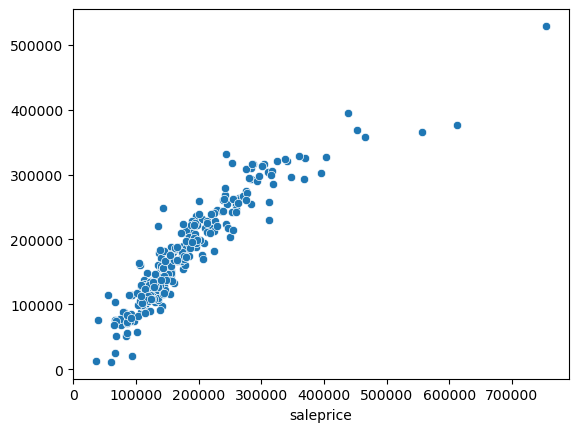

In [855]:
sns.scatterplot(x=y_test, y=y_test_pred_lasso)
plt.show()

# Ridge Regression

In [856]:
model_ridge = Ridge(alpha=0.9, max_iter=1000)
model_ridge.fit(X_train_scaled1, y_train)


train_score = model_ridge.score(X_train_scaled1, y_train)
test_score = model_ridge.score(X_test_scaled1,y_test)

y_train_pred_ridge = model_ridge.predict(X_train_scaled1)
y_test_pred_ridge = model_ridge.predict(X_test_scaled1)

train_rmse_ridge = np.sqrt(mean_squared_error(y_train,y_train_pred_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test,y_test_pred_ridge))

train_r2score_ridge = r2_score(y_train, y_train_pred_ridge)
test_r2score_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"train score for ridge: {train_score}")
print(f"test score for ridge: {test_score}")
print("---------------------------------")
print(f"train_rmse: {train_rmse_ridge}")
print(f"test_rmse: {test_rmse_ridge}")
print("---------------------------------")
print(f"train_r2score: {train_r2score_ridge}")
print(f"test_r2score: {test_r2score_ridge}")

train score for ridge: 0.8522988187267174
test score for ridge: 0.845635096493274
---------------------------------
train_rmse: 28820.03499323526
test_rmse: 34409.72485849825
---------------------------------
train_r2score: 0.8522988187267174
test_r2score: 0.845635096493274


# XGB

In [857]:
model_xgb = XGBRegressor()
model_xgb.fit(X_train_scaled1, y_train)

train_score = model_xgb.score(X_train_scaled1, y_train)
test_score = model_xgb.score(X_test_scaled1,y_test)

y_train_pred_xgb = model_xgb.predict(X_train_scaled1)
y_test_pred_xgb = model_xgb.predict(X_test_scaled1)

train_rmse_xgb = np.sqrt(mean_squared_error(y_train,y_train_pred_xgb))
test_rmse_xgb = np.sqrt(mean_squared_error(y_test,y_test_pred_xgb))

train_r2score_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2score_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"train score for xgb: {train_score}")
print(f"test score for xgb: {test_score}")
print("---------------------------------")
print(f"train_rmse: {train_rmse_xgb}")
print(f"test_rmse: {test_rmse_xgb}")
print("---------------------------------")
print(f"train_r2score: {train_r2score_xgb}")
print(f"test_r2score: {test_r2score_xgb}")

train score for xgb: 0.9995082982706118
test score for xgb: 0.8859794406617851
---------------------------------
train_rmse: 1662.851196775066
test_rmse: 29573.21227817573
---------------------------------
train_r2score: 0.9995082982706118
test_r2score: 0.8859794406617851


In [873]:
model_lasso.coef_, model_lasso.feature_names_in_

(array([  3253.29962916,  19564.53686687,   6288.904392  ,    439.58091567,
          3523.80488498,  12689.92697726,  28034.28995181,  -2185.11954701,
          2559.33449257,   6672.27228761,   2488.22347151, -22178.22888886,
          6699.15576859,  14042.11793053,  -5272.96506626, -20845.82087905,
        -14953.25793682,  -8636.06519351,  15445.80159848,  -4281.54542036,
         -9883.44919287,   2168.13081902,  -7603.81678683,  -5991.63931052,
         -9375.86642469]),
 array(['lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'masvnrarea',
        'totalbsmtsf', 'grlivarea', 'totrmsabvgrd', 'fireplaces',
        'garagearea', 'outside_area', 'utilities_NoSeWa', 'landslope_Mod',
        'landslope_Sev', 'bldgtype_2fmCon', 'bldgtype_Duplex',
        'bldgtype_Twnhs', 'bldgtype_TwnhsE', 'bsmtexposure_Gd',
        'bsmtexposure_Mn', 'bsmtexposure_No', 'heatingqc_Fa',
        'heatingqc_Gd', 'heatingqc_Po', 'heatingqc_TA'], dtype=object))

In [874]:
important_featues = pd.DataFrame()

important_featues['features'] = model_lasso.feature_names_in_
important_featues['importances'] = model_lasso.coef_
important_featues.sort_values(by='importances', ascending=True).head(50)

,features,importances
11,utilities_NoSeWa,-22178.228889
15,bldgtype_Duplex,-20845.820879
16,bldgtype_Twnhs,-14953.257937
20,bsmtexposure_No,-9883.449193
24,heatingqc_TA,-9375.866425
17,bldgtype_TwnhsE,-8636.065194
22,heatingqc_Gd,-7603.816787
23,heatingqc_Po,-5991.639311
14,bldgtype_2fmCon,-5272.965066
19,bsmtexposure_Mn,-4281.545420


In [875]:
model_lasso.intercept_

-675284.9234274528

In [861]:
model = Lasso(max_iter=5000)
params = {'alpha': [0.1,10,100]}
cv_score = 5

grid_cv = GridSearchCV(estimator = model, param_grid= params, cv = cv_score)
grid_cv.fit(X_train_scaled1, y_train)

print(f"Best alpha for lasso: {grid_cv.best_params_}")
print(f"Best score for lasso: {grid_cv.best_score_}")

Best alpha for lasso: {'alpha': 100}
Best score for lasso: 0.8415800293863075


In [862]:
model = Ridge()
params = {'alpha': [0.1,10,100]}
cv_score = 5

grid_cv = GridSearchCV(estimator = model, param_grid= params, cv = cv_score)
grid_cv.fit(X_train_scaled1, y_train)

print(f"Best alpha for ridge: {grid_cv.best_params_}")
print(f"Best score for ridge: {grid_cv.best_score_}")

Best alpha for ridge: {'alpha': 10}
Best score for ridge: 0.8421505034137319


In [863]:
results_df = pd.DataFrame()
results_df['model_name'] = ['linear regression','lasso','ridge']
results_df['train rmse'] = [train_rmse_lr, train_rmse_lasso, train_rmse_ridge]
results_df['test rmse'] = [test_rmse_lr, test_rmse_lasso, test_rmse_ridge]
results_df['train r2score'] = [train_r2score_lr, train_r2score_lasso, train_r2score_ridge]
results_df['test r2score'] = [test_r2score_lr, test_r2score_lasso, test_r2score_ridge]

results_df

,model_name,train rmse,test rmse,train r2score,test r2score
0,linear regression,28813.875336,34497.552463,0.852362,0.844846
1,lasso,28813.927059,34488.937974,0.852361,0.844924
2,ridge,28820.034993,34409.724858,0.852299,0.845635


# Export Model

In [864]:
import joblib
from joblib import dump

In [876]:
dump(model_lasso, r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\House price prediction\bestmodel.joblib")

scaler_with_cols = {
    'scaler': scaler,
    'cols_to_scale': cols_to_scale
}
dump(scaler_with_cols,r"C:\Users\aravit01\OneDrive - Kearney\1. RAVI TEJA\12. My Learnings\Portfolio Projects to Showcase\House price prediction\bestscaler.joblib")

['C:\\Users\\aravit01\\OneDrive - Kearney\\1. RAVI TEJA\\12. My Learnings\\Portfolio Projects to Showcase\\House price prediction\\bestscaler.joblib']

# Error analysis

In [641]:
residuals = (y_test_pred_xgb - y_test)
residuals_perc = (residuals * 100)/y_test



residuals_df = pd.DataFrame({
    'actuals': y_test,
    'predictied': y_test_pred_xgb,
    'diff': residuals,
    'diff_perc': residuals_perc.abs()
})

residuals_df.sort_values(by='diff_perc', ascending=False)
residuals_df[residuals_df['diff_perc'] > 20]

,actuals,predictied,diff,diff_perc
218,311500,236356.609375,-75143.390625,24.123079
1061,81000,127885.750000,46885.750000,57.883642
277,141000,101756.195312,-39243.804688,27.832486
1173,200500,307548.218750,107048.218750,53.390633
1398,138000,166957.531250,28957.531250,20.983718
581,253293,383224.187500,129931.187500,51.296794
772,107000,145289.796875,38289.796875,35.784857
29,68500,82555.281250,14055.281250,20.518659
619,305000,389053.875000,84053.875000,27.558648
1131,93500,122630.687500,29130.687500,31.155816


In [329]:
X_train.shape, X_test.shape, y_test.shape, y_train.shape

((1137, 52), (292, 52), (292,), (1137,))

In [332]:
X_train['lotarea'].mean(), X_train['lotarea'].median()

(9613.890941073, 9549.0)

In [333]:
X_train['lotarea'].max()

25000.0

In [334]:
X_train['garagearea'].mean(), X_train['garagearea'].median()

(472.197889182058, 480.0)

In [335]:
merged_df_test[merged_df_test['yearbuilt'] > merged_df_test['garageyrblt']][['yearbuilt','garageyrblt']]

,yearbuilt,garageyrblt
29,1927.0,1920.0
1131,1991.0,1980.0
736,1950.0,1949.0
1414,1923.0,1922.0
324,1967.0,1961.0


In [336]:
merged_df_test[merged_df_test['yrsold'] < merged_df_test['yearbuilt']][['yrsold','yearbuilt']]

,yrsold,yearbuilt


In [337]:
merged_df_test[merged_df_test['yearbuilt'] > merged_df_test['yearremodadd']][['yearbuilt','yearremodadd']]

,yearbuilt,yearremodadd


In [110]:
merged_df_test[merged_df_test['bsmtunfsf'] > merged_df_test['totalbsmtsf']][['bsmtunfsf','totalbsmtsf']]

,bsmtunfsf,totalbsmtsf


In [791]:
for i in X_train[['bldgtype','bsmtexposure','heatingqc','landslope']].columns:
    print(f"{i}: {X_train[i].unique()}")

bldgtype: ['1Fam' 'Duplex' 'TwnhsE' '2fmCon' 'Twnhs']
bsmtexposure: ['No' 'Av' 'Gd' 'Mn']
heatingqc: ['TA' 'Gd' 'Ex' 'Fa' 'Po']
landslope: ['Gtl' 'Mod' 'Sev']


In [817]:
len(X_train_scaled1.columns), len(X_test_scaled1.columns)

(25, 25)

In [866]:
X_train_scaled1.columns

Index(['lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'masvnrarea',
       'totalbsmtsf', 'grlivarea', 'totrmsabvgrd', 'fireplaces', 'garagearea',
       'outside_area', 'utilities_NoSeWa', 'landslope_Mod', 'landslope_Sev',
       'bldgtype_2fmCon', 'bldgtype_Duplex', 'bldgtype_Twnhs',
       'bldgtype_TwnhsE', 'bsmtexposure_Gd', 'bsmtexposure_Mn',
       'bsmtexposure_No', 'heatingqc_Fa', 'heatingqc_Gd', 'heatingqc_Po',
       'heatingqc_TA'],
      dtype='object')

In [551]:
model_lasso.coef_

array([ 5809.97256818, 22646.31875631,  6732.68360947,   482.86448537,
       14010.46859633, 27933.681128  , -3880.21432665,  3196.27981194,
        7520.91833356,  3334.55174387])